In [1]:
####################################################
#
# Libraries
#

import numpy             as np
import datetime          as datetime
import os                as os
import platform          as platform


import matplotlib              as mpl
import matplotlib.pyplot       as plt
import matplotlib.patches      as patches
import matplotlib.font_manager as fm
import matplotlib              as mpl


import pandas            as pd
import xarray            as xr
import pint_xarray       as px

import netCDF4           as nc4

import wrf               as wrf


import matplotlib.gridspec as gridspec

import metpy.calc        as mpcalc
from metpy.plots import SkewT, Hodograph
from metpy.units import units, pandas_dataframe_to_unit_arrays


import metpy.calc  as mpcalc

from metpy.units import units

import seaborn           as sns

import timezonefinder    as tzf
import pytz as pytz
import socket as socket

import matplotlib.font_manager as fm
import matplotlib as mpl



#
####################################################
####################################################
####################################################

In [2]:
####################################################
####################################################
####################################################
#
# Mines Colors and Fonts
#

Mines_Blue = "#002554"


plt.rcParams.update({'text.color'      : Mines_Blue,
                     'axes.labelcolor' : Mines_Blue,
					 'axes.edgecolor'  : Mines_Blue,
					 'xtick.color'     : Mines_Blue,
					 'ytick.color'     : Mines_Blue})


#
####################################################
####################################################
########################################################################################################
####################################################
####################################################
#
# File Organization
#
intel         = True
beta_on       = 0
max_domains   = 2
chosen_domain = 1

if (socket.gethostname() == "kyrill"):
    WRF_OVERALL_DIR = "/projects/SD_Mines_WRF_REALTIME/"
else:
    if (platform.system() == "Darwin"):
         WRF_OVERALL_DIR = "/Users/wjc/GitHub/SD_Mines_WRF_REALTIME/"
    else:
         WRF_OVERALL_DIR = "/home/wjc/GitHub/SD_Mines_WRF_REALTIME/"



os.chdir(WRF_OVERALL_DIR)

print( "Current Working Directory is now " + os.getcwd() )
    
WPS_WORK    = WRF_OVERALL_DIR + "./WPS_PrepArea/"
WPS_EXE     = WRF_OVERALL_DIR + "./WRF4/WPS/"
WRF_EXE     = WRF_OVERALL_DIR + "./WRF4/WRF/test/em_real/"
WRF_ARCHIVE = WRF_OVERALL_DIR + "./ARCHIVE/"
WRF_IMAGES  = WRF_OVERALL_DIR + "./WEB_IMAGES/"

TS_DIR = WRF_EXE

station_list_file = WRF_OVERALL_DIR + "namelist_files_and_local_scripts/time_series_station_files_"+str(max_domains)+"_dom_all.xlsx"

os.chdir(WRF_EXE)

#
####################################################
####################################################
####################################################

with open(WRF_OVERALL_DIR + "./current_run.txt") as f:
    model_start_date_YYYY_MM_DD_HH = f.readlines()

model_start_date_YYYY_MM_DD_HH     = model_start_date_YYYY_MM_DD_HH[0][0:13]

model_start_date_YYYY_MM_DD_HH0000 = model_start_date_YYYY_MM_DD_HH + ":00:00"
print(model_start_date_YYYY_MM_DD_HH0000)
    
model_start_datetime = datetime.datetime.strptime(model_start_date_YYYY_MM_DD_HH0000, '%Y-%m-%d_%H:%M:%S')
print("Model Simulation Date ", model_start_datetime)

model_end_datetime  = model_start_datetime + datetime.timedelta(hours=36)
current_datetime    = datetime.datetime.utcnow()
siphon_end_datetime = min(current_datetime,model_end_datetime)

print( "Current Working Directory is now " + os.getcwd() )
print( "         Model Start Datetime is " + model_start_datetime.strftime("%Y-%m-%d %H:00:00"))
print( "           Model End Datetime is " +   model_end_datetime.strftime("%Y-%m-%d %H:00:00"))
print( "             Current Datetime is " +     current_datetime.strftime("%Y-%m-%d %H:00:00"))
print( "          Siphon End Datetime is " +  siphon_end_datetime.strftime("%Y-%m-%d %H:00:00"))
print( "               Station List File " +    station_list_file)

wrf_skewt_time    = model_start_datetime.strftime("%Y-%m-%d %H UTC")


tf     = tzf.TimezoneFinder()
tz     = tf.certain_timezone_at(lng=-104, lat=44)
tzabbr = pytz.timezone(tz).localize(model_start_datetime)


print(model_start_date_YYYY_MM_DD_HH0000)

nt = 25
wrf_time_steps = [model_start_datetime - datetime.timedelta(hours=x) for x in range(nt)]

local_time = pd.to_datetime(wrf_time_steps).tz_localize(tz="UTC").tz_convert(tz=tz)
# local_time.strftime('%a')

print(local_time)

Current Working Directory is now /Users/wjc/GitHub/SD_Mines_WRF_REALTIME
2023-01-01_12:00:00
Model Simulation Date  2023-01-01 12:00:00
Current Working Directory is now /Users/wjc/GitHub/SD_Mines_WRF_REALTIME/WRF4/WRF/test/em_real
         Model Start Datetime is 2023-01-01 12:00:00
           Model End Datetime is 2023-01-03 00:00:00
             Current Datetime is 2023-02-07 23:00:00
          Siphon End Datetime is 2023-01-03 00:00:00
               Station List File /Users/wjc/GitHub/SD_Mines_WRF_REALTIME/namelist_files_and_local_scripts/time_series_station_files_2_dom_all.xlsx
2023-01-01_12:00:00
DatetimeIndex(['2023-01-01 05:00:00-07:00', '2023-01-01 04:00:00-07:00',
               '2023-01-01 03:00:00-07:00', '2023-01-01 02:00:00-07:00',
               '2023-01-01 01:00:00-07:00', '2023-01-01 00:00:00-07:00',
               '2022-12-31 23:00:00-07:00', '2022-12-31 22:00:00-07:00',
               '2022-12-31 21:00:00-07:00', '2022-12-31 20:00:00-07:00',
               '2022-12-3

Percent Done 0.625
Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88)


AttributeError: 'datetime.datetime' object has no attribute 'values'

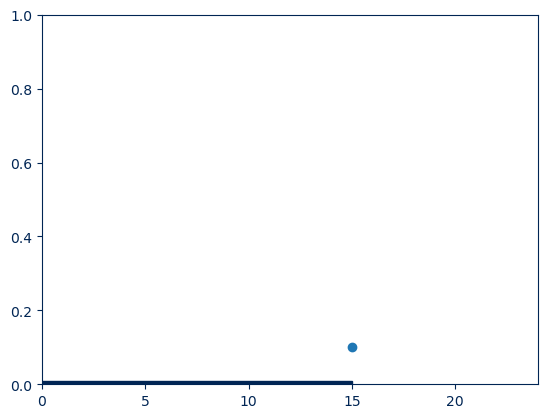

In [3]:
t=15

percent_done = (1.0 * t) / (nt-1.)
print("Percent Done", percent_done)


fig, ax1 = plt.subplots()


ax1.scatter([t],[.1])
ax1.set_xlim(0,24)
ax1.set_ylim(0,1)


if (1<2):

            ##################################
            # 
            # Progress Bar
            #
            
            plot_box         = ax1.get_position()
            print(plot_box)
            plot_box_x_start = plot_box.x0
            plot_box_y_start = plot_box.y0
            plot_box_x_end   = plot_box.x1
            plot_box_y_end   = plot_box.y1


    
            rect1 = patches.Rectangle(xy        = (0, 0),
                                      width     = percent_done,
                                      height    = 0.01, 
                                      edgecolor = Mines_Blue, 
                                      facecolor = Mines_Blue,
                                      transform = ax1.transAxes)
            ax1.add_patch(rect1)
            #
            # Walking Clock
            #
                        
            time_for_clock = pd.to_datetime(wrf_time_steps[t].values).tz_localize(tz="UTC").tz_convert(tz=tz).time()

            hour   = time_for_clock.hour
            minute = time_for_clock.minute
            second = time_for_clock.second
            dow    = time_for_clock.strftime('%a')
            
            if ((hour >= 18) or (hour < 6)):
                Clock_Color = "white"
                Clock_BgndC = Mines_Blue               
            else:
                Clock_Color = Mines_Blue
                Clock_BgndC = "white"           


            circle_theta  = np.deg2rad(np.arange(0,360,0.01))
            circle_radius = circle_theta * 0 + 1

            if (hour > 12) :
                hour = hour - 12

            angles_h = 2*np.pi*hour/12+2*np.pi*minute/(12*60)+2*second/(12*60*60)
            angles_m = 2*np.pi*minute/60+2*np.pi*second/(60*60)
                

            
            size_of_clock = 0.07
            
            x_clock = percent_done*(plot_box_x_end-plot_box_x_start) + plot_box_x_start - size_of_clock/2
            y_clock = plot_box_y_start-size_of_clock/2
            
            x_dow = percent_done
            y_dow = size_of_clock
            
            ax1.annotate(dow, 
                         [x_dow,y_dow],
                         horizontalalignment="center",
                        verticalalignment="center",
                        xycoords='axes fraction')
           
            
            axins = fig.add_axes(rect     =    [x_clock,
                                                y_clock,
                                                size_of_clock,
                                                size_of_clock],
                                 projection =  "polar")
            
            #axins.tight_layout()
            plt.setp(axins.get_yticklabels(), visible=False)
            plt.setp(axins.get_xticklabels(), visible=False)
            axins.spines['polar'].set_visible(False)
            axins.set_ylim(0,1)
            axins.set_theta_zero_location('N')
            axins.set_theta_direction(-1)
            axins.set_facecolor(Clock_BgndC)
            axins.grid(False)

            axins.plot([angles_h,angles_h], [0,0.60], color=Clock_Color, linewidth=1)
            axins.plot([angles_m,angles_m], [0,0.95], color=Clock_Color, linewidth=1)
            axins.plot(circle_theta, circle_radius,   color=Mines_Blue,  linewidth=1)
            
            #
            ##################################



plt.show()

In [ ]:
print(plot_box)

In [ ]:
axins.get_position()

In [ ]:
0.90625-0.94375


In [ ]:
0.10999999999999999-0.15999999999999998

In [ ]:
[x_dow,y_dow]